In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [9]:
df.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
112,6.8,3.0,5.5,2.1,2
14,5.8,4.0,1.2,0.2,0


In [10]:
df = df[['sepal_length','petal_length','species']]
df.sample(5)

,sepal_length,petal_length,species
128,6.4,5.6,2
111,6.4,5.3,2
12,4.8,1.4,0
65,6.7,4.4,1
17,5.1,1.4,0


In [44]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.2,random_state=2)

In [54]:
clf = LogisticRegression(multi_class='multinomial')
#The techninal name of  softmax regression is multinomial Logistic regression

In [55]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [56]:
y_pred = clf.predict(X_test)

In [57]:
print("accuracy score is: ",accuracy_score(y_test,y_pred))
pd.DataFrame(confusion_matrix(y_test,y_pred))

accuracy score is:  0.9666666666666667


,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [58]:
#Query point
X_q = np.array([[6.4,5.1]])
clf.predict_proba(X_q)

array([[3.31757223e-04, 3.20654026e-01, 6.79014217e-01]])

In [59]:
clf.predict(X_q)

array([2])

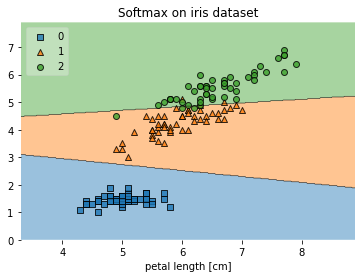

In [60]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values,clf,legend = 2)
plt.xlabel("sepal length [cm]")
plt.xlabel("petal length [cm]")
plt.title("Softmax on iris dataset")
plt.show()